<a href="https://colab.research.google.com/github/venkatesh-eranti/clustering_Bank-Telemarketing-Campaign-Case-Study/blob/main/clustering_Bank_Telemarketing_Campaign_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset and required libraries

In [9]:
data='https://raw.githubusercontent.com/qtannn/bank-telemarketing/refs/heads/main/bank_marketing_dataset.csv'

## importing the required libraries

In [10]:
! pip install kmodes

In [11]:
import numpy as np
import pandas as pd
# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# supress warnings
import warnings
warnings.filterwarnings('ignore')
# clustering
from kmodes.kprototypes import KPrototypes
# categorical data to numerica
from sklearn.preprocessing import LabelEncoder

## loading the data

In [12]:
df=pd.read_csv(data)


# Understanding the data

In [13]:
df.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


first two rows are summary rows. so those are not required

In [14]:
df=pd.read_csv(data,skiprows=2)
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [15]:
df.shape

(45211, 19)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

seems there are many objects --> need to convert those to numbers <br>
need to impute/ remove missing values

# cleansing the data

## identify the data types

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

## fixing the rows

In [18]:
# converting duration column to numeric
df['duration'].apply(lambda x:x.split()[1]).value_counts()

,count
duration,
min,31096
sec,14115


In [19]:
# as most of the data is in minutes, all the duration to be converted to minutes
df['duration'][df['duration'].apply(lambda x:x.split()[1]=='sec')]=df['duration'][df['duration'].apply(lambda x:x.split()[1]=='sec')].apply(lambda x:float(x.split()[0])/60)

In [20]:
def min_strip(x):
    try:
        if x.split()[1]=='min':
            return float(x.split()[0])
    except:
        return x

In [21]:
df['duration']=df['duration'].apply(min_strip)

In [22]:
df['duration'].dtype

dtype('float64')

## fixing the columns

In [23]:
df.drop('customerid',axis=1,inplace=True)

In [24]:
# splitting jobedu column as job and edu
df['job']=df['jobedu'].apply(lambda x:x.split(',')[0])
df['education']=df['jobedu'].apply(lambda x:x.split(',')[1])

In [25]:
df['job'].value_counts()

,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


In [26]:
df['education'].value_counts()

,count
education,
secondary,23202
tertiary,13301
primary,6851
unknown,1857


dropping jobedu column from dataframe

In [27]:
df.drop('jobedu',axis=1,inplace=True)

In [28]:
# day is not useful for our study. so dropping that column
df.drop('day',axis=1,inplace=True)

need to check if all the data is for same year or not if all are from same year we can remove the year from the month.<br>
if not we can retain the year also month has some null values and

In [29]:
df['month'][~df['month'].isnull()].apply(lambda x:x.split(',')[1]).value_counts()

,count
month,
2017,45161


In [30]:
df['month'][~df['month'].isnull()]=df['month'][~df['month'].isnull()].apply(lambda x:x.split(',')[0])

In [31]:
df['month'].value_counts()

,count
month,
may,13747
jul,6888
aug,6240
jun,5335
nov,3968
apr,2931
feb,2646
jan,1402
oct,738


In [32]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,may,1.266667,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,may,1.533333,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,may,3.300000,1,-1,0,unknown,no,unknown,unknown


In [33]:
df['pdays'].value_counts()

,count
pdays,
-1,36954
182,167
92,147
91,126
183,126
...,...
449,1
452,1
648,1


pdays represents: This column represents  the no of days passed by since the customer has been reached via bank for any of the other products (not term deposit). Here, the value ‘-1’ represents that the customer has never been reached for any product

as this `-1` spoils my analysis i will replace this -1 as nan so that this wont come in my analysis

In [34]:
df['pdays'][df['pdays']==-1]=df['pdays'][df['pdays']==-1]=np.nan

In [35]:
df['pdays'].describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


# imputing or removing the missing values

In [36]:
df.isnull().sum()

,0
age,20
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
month,50


as `response` feature is more important for this case study and missing values are also only 30 (i.e., 0.06%) i am going to remove these missing values

In [37]:
df=df[~df['response'].isnull()]

as `age` is continuous variable i am going to impute this missing data as mean of age

In [38]:
df['age'].fillna(df['age'].mean(),inplace=True)

as `month` is categorical variable i am going to impute these missing data with mode of this feature

In [39]:
df['month'].fillna('may',inplace=True)

In [40]:
df['month'][df['month'].isnull()]=df['month'].mode()

In [41]:
df.isnull().sum()

,0
age,0
salary,0
balance,0
marital,0
targeted,0
default,0
housing,0
loan,0
contact,0
month,0


# handling Outliers

In [42]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,age,salary,balance,duration,campaign,pdays,previous
count,45181.000000,45181.000000,45181.000000,45181.000000,45181.000000,8251.000000,45181.000000
mean,40.935763,57005.046369,1362.689936,4.302462,2.763352,224.596170,0.580355
std,10.616439,32089.163369,3045.584521,4.292520,3.096578,115.352191,2.303987
min,18.000000,0.000000,-8019.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,20000.000000,72.000000,1.716667,1.000000,133.000000,0.000000
50%,39.000000,60000.000000,448.000000,3.000000,2.000000,195.000000,0.000000
75%,48.000000,70000.000000,1428.000000,5.316667,3.000000,327.000000,0.000000
90%,56.000000,100000.000000,3575.000000,9.116667,5.000000,363.000000,2.000000
95%,59.000000,100000.000000,5769.000000,12.516667,8.000000,370.000000,3.000000
99%,71.000000,120000.000000,13169.200000,21.156667,16.000000,531.500000,9.000000


<Axes: ylabel='age'>

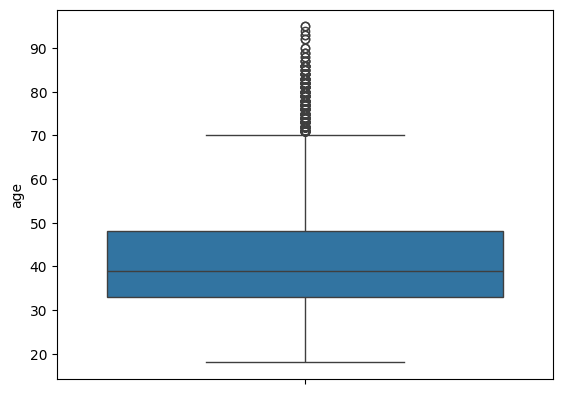

In [43]:
sns.boxplot(df['age'])

In [44]:
df['age'][df['age']>70].count()

487

only 480+ people are more than 70+ age seems age feature dont have any oulier

<Axes: ylabel='salary'>

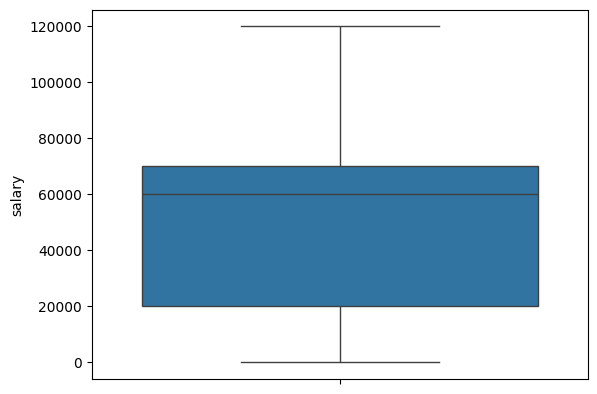

In [45]:
sns.boxplot(df['salary'])

1) for `balance` there are some negative values and in banking sector negative balance doesn't seem to be erroneous <br> 2) and there is a big difference between mean(1362) and median (448) <br> 3) 75% to max and even 99% to max also having huge jump.<br>
seems to have some outliers in this feature

<Axes: ylabel='balance'>

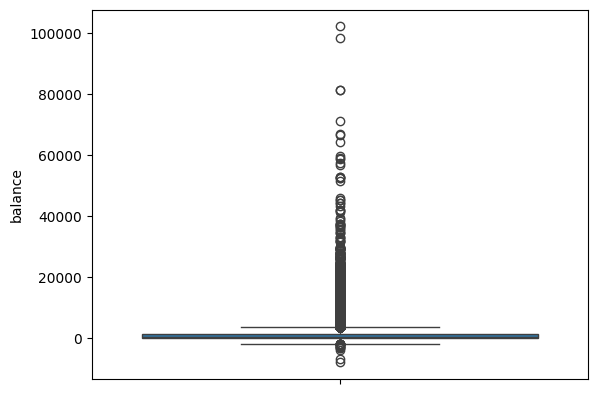

In [46]:
sns.boxplot(df['balance'])

seems to have higher values but rather a continuous values. so lets check summary of values greater than 99% percentiles

In [47]:
df[df['balance']>14000].describe()

,age,salary,balance,duration,campaign,pdays,previous
count,392.000000,392.000000,392.000000,392.000000,392.000000,65.000000,392.000000
mean,45.081633,69278.061224,23264.767857,4.286012,2.760204,187.261538,0.515306
std,12.130091,33905.264864,11866.261899,4.113635,3.070135,116.471466,1.707444
min,23.000000,0.000000,14004.000000,0.016667,1.000000,31.000000,0.000000
25%,34.000000,50000.000000,16430.000000,1.662500,1.000000,97.000000,0.000000
50%,44.000000,60000.000000,19841.500000,2.941667,2.000000,168.000000,0.000000
75%,55.000000,100000.000000,24802.500000,5.304167,3.000000,245.000000,0.000000
max,84.000000,120000.000000,102127.000000,27.050000,31.000000,589.000000,23.000000


after 14000 balance all the people are from higher age group and higher salary bracket. so these values doen't seem as erroneous

# Univariate analysis

## plotting Nominal variables (un-ordered categorical variables)

In [48]:
df.head(2)

,age,salary,balance,marital,targeted,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,may,4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,may,2.516667,1,NaN,0,unknown,no,technician,secondary


In [49]:
df['marital'].value_counts(normalize=True)

,proportion
marital,
married,0.601912
single,0.282907
divorced,0.115181


In [58]:
sns.countplot(df['marital'])
for i,v in enumerate(df['marital'].value_counts()):
    plt.text(i-.15,v-1100,str(v))

ValueError: Image size of 605x3015466 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000')])

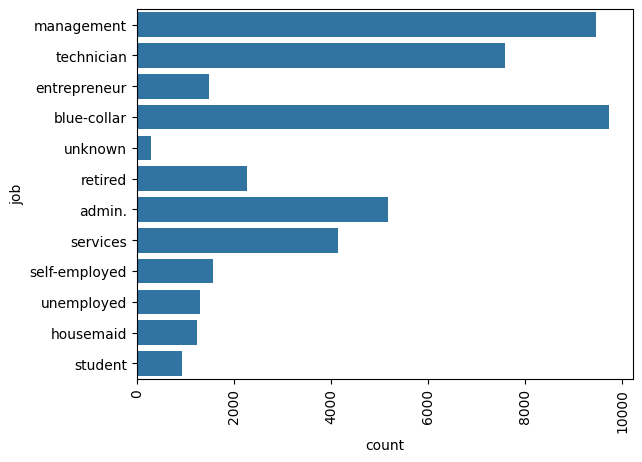

In [51]:
sns.countplot(df['job'])
plt.xticks(rotation=90)

## plotting ordinal features (ordered categorical features)

<Axes: xlabel='education'>

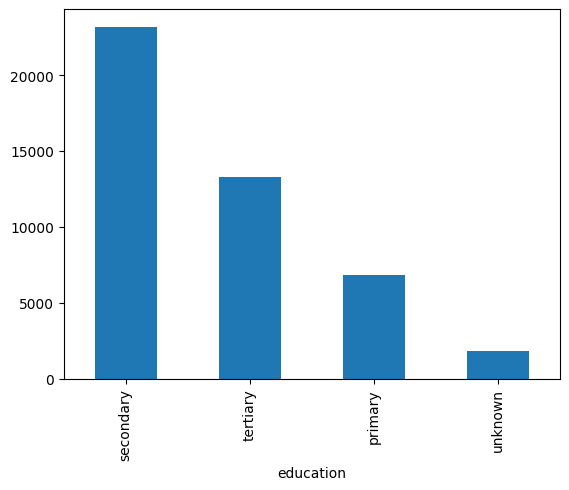

In [52]:
df['education'].value_counts().plot.bar()

<Axes: xlabel='poutcome'>

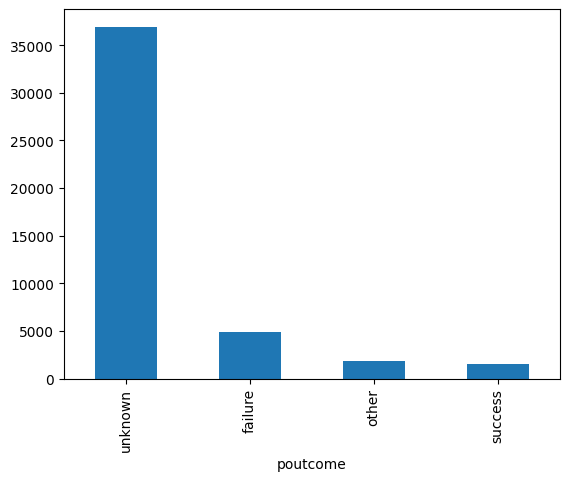

In [53]:
df['poutcome'].value_counts().plot.bar()

<Axes: xlabel='poutcome'>

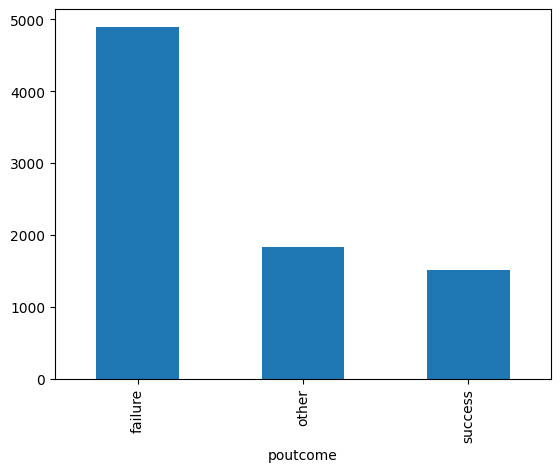

In [54]:
# removing unknown and plotting again
df['poutcome'][~(df['poutcome']=='unknown')].value_counts().plot.bar()

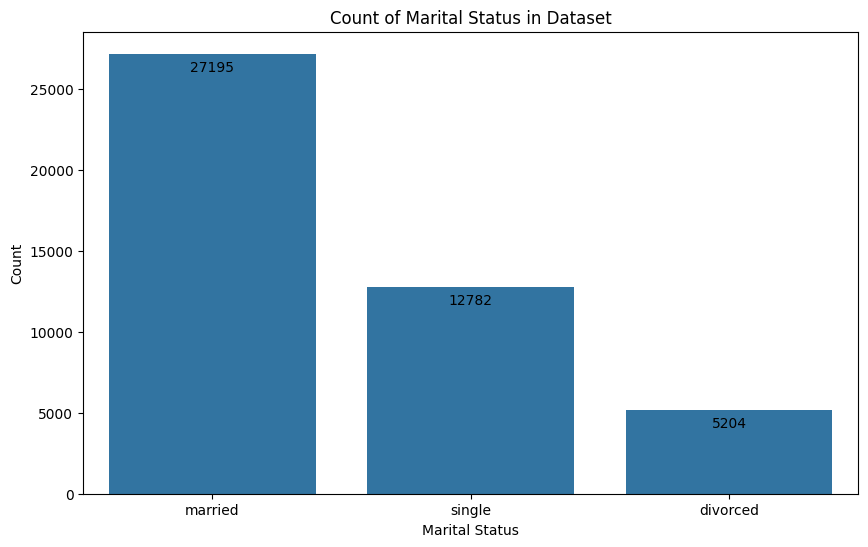

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a reasonable figure size
plt.figure(figsize=(10, 6))

# Create the count plot
sns.countplot(data=df, x='marital')

# Adding text annotations for counts
for i, v in enumerate(df['marital'].value_counts()):
    plt.text(i, v - 1100, str(v), ha='center')  # Adjusted position and alignment

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Count of Marital Status in Dataset')
plt.show()


# Bivariate analysis

## Numerical-Numerical

<Axes: xlabel='age', ylabel='balance'>

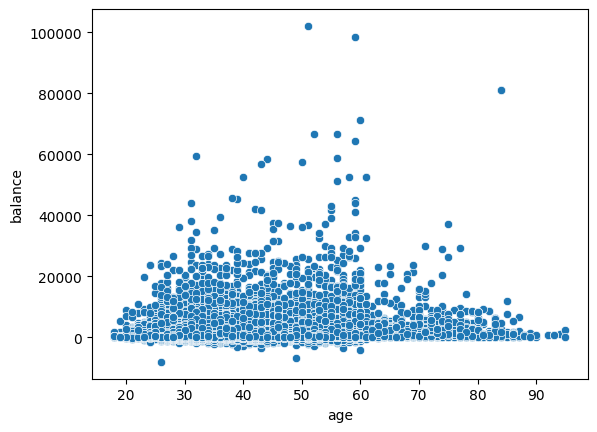

In [60]:
sns.scatterplot(data = df, x='age', y='balance')

<Axes: xlabel='salary', ylabel='balance'>

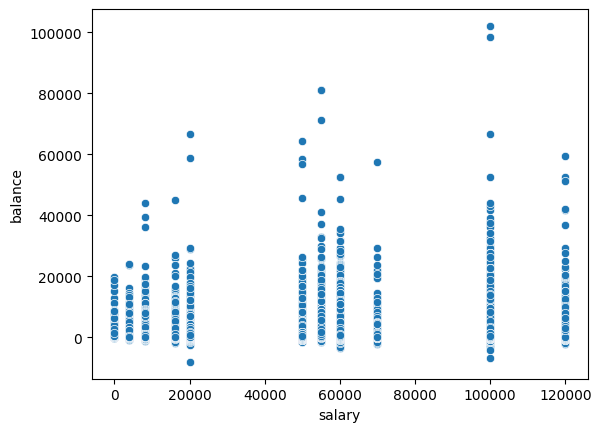

In [61]:
sns.scatterplot(data = df, x='salary', y='balance')

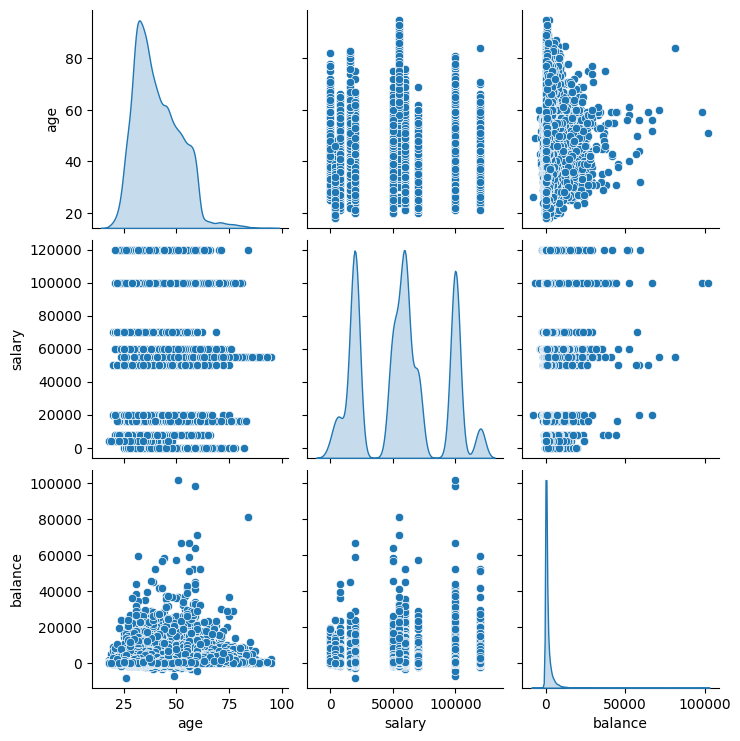

In [62]:
sns.pairplot(df[['age','salary','balance']],diag_kind='kde')

<Axes: >

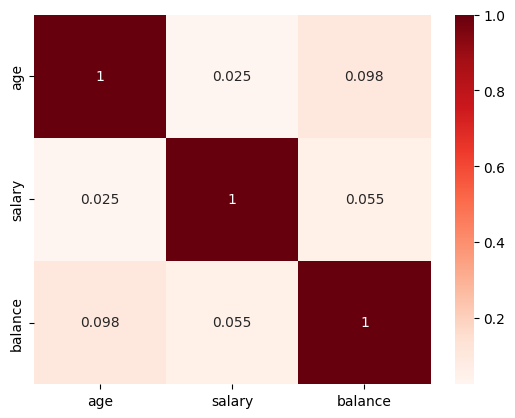

In [63]:
sns.heatmap(df[['age','salary','balance']].corr(),annot=True,cmap='Reds')

## Numerical - Categorical

In [64]:
response_group=df.groupby('response')
response_group['salary'].mean()

,salary
response,
no,56770.917933
yes,58771.704180


In [65]:
response_group['salary'].median()

,salary
response,
no,60000.0
yes,60000.0


<Axes: xlabel='response', ylabel='salary'>

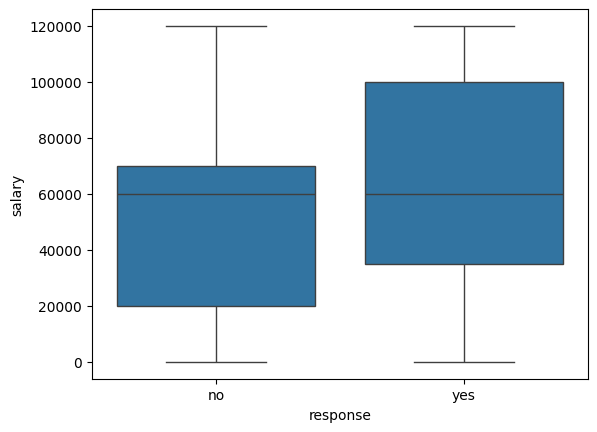

In [67]:
sns.boxplot(data = df, x='response', y= 'salary')

for response yes and no the medians are same but the number of people who responded yes, majority of their salaries have more than 60000. <br>
the number of people who responded NO,majority of their salaries have less than 60000

In [68]:
response_group['balance'].mean()

,balance
response,
no,1304.094525
yes,1804.832041


In [69]:
response_group['balance'].median()

,balance
response,
no,417.0
yes,733.0


<Axes: xlabel='response', ylabel='balance'>

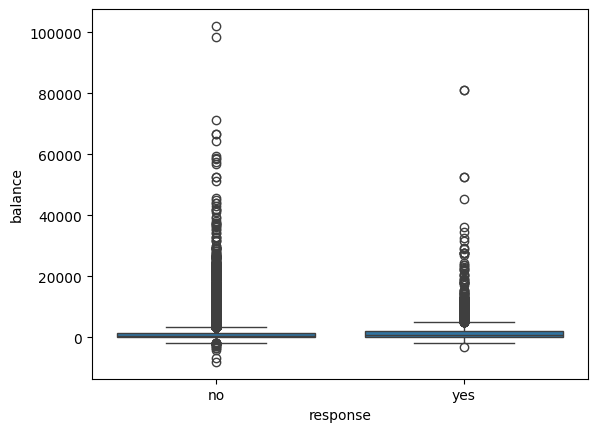

In [70]:
sns.boxplot(data = df, x='response', y= 'balance')

In [71]:
def p75(x):
    return np.percentile(x,75)
df.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.094525,417.0,1345.0
yes,1804.832041,733.0,2159.5


In [72]:
df.groupby('response')['balance'].describe()

,count,mean,std,min,25%,50%,75%,max
response,,,,,,,,
no,39894.0,1304.094525,2975.033811,-8019.0,58.0,417.0,1345.0,102127.0
yes,5287.0,1804.832041,3501.645424,-3058.0,210.5,733.0,2159.5,81204.0


In [73]:
df.groupby('education')['salary'].aggregate(['mean','median'])

,mean,median
education,,
primary,34220.192870,20000.0
secondary,49739.143559,55000.0
tertiary,82875.564249,100000.0
unknown,46529.633621,50000.0


In [74]:
df.groupby('education')['response'].value_counts(normalize=True)

education  response
primary    no          0.913647
           yes         0.086353
secondary  no          0.894390
           yes         0.105610
tertiary   no          0.849910
           yes         0.150090
unknown    no          0.864224
           yes         0.135776
Name: proportion, dtype: float64

In [75]:
df.groupby('job')['salary'].mean().sort_values(ascending=False)

,salary
job,
entrepreneur,120000.0
management,100000.0
services,70000.0
self-employed,60000.0
technician,60000.0
retired,55000.0
admin.,50000.0
blue-collar,20000.0
housemaid,16000.0


# categorical - categorical

In [ ]:
df['response_flag']=df['response'].replace({'no':0,'yes':1})

In [ ]:
df.groupby('education')['response_flag'].mean()

In [ ]:
df.groupby('education')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per education')
plt.ylabel('response %')

In [ ]:
df.groupby('marital')['response_flag'].mean()

In [ ]:
df.groupby('marital')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per marital status')
plt.ylabel('response %')

In [ ]:
df.groupby('loan')['response_flag'].mean()

In [ ]:
df.groupby('loan')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per personal loan')
plt.ylabel('response %')

In [ ]:
df.groupby('housing')['response_flag'].mean()

In [ ]:
df.groupby('housing')['response_flag'].mean().sort_values(ascending=False).plot.bar()
plt.title('response as per housing loan')
plt.ylabel('response %')

In [ ]:
sns.boxplot(df['response'],df['age'])

In [ ]:
df.groupby(['response'])['age'].mean()

In [ ]:
df.groupby(['response'])['age'].median()

In [ ]:
df['age_bucket']=pd.cut(df['age'],bins=[0,30,40,50,60,70,100],labels=['<30','<40','<50','<60','<70','<100'])

In [ ]:
df.drop('age',axis=1,inplace=True)

In [ ]:
df.groupby('age_bucket')['response_flag'].mean()

In [ ]:
df.groupby('age_bucket')['response_flag'].mean().plot.bar()
plt.title('response as per age group')
plt.ylabel('response %')

# Multivariate analysis

In [78]:
df.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response', 'job', 'education'],
      dtype='object')

In [80]:
df[['education','marital','response']].corr()

ValueError: could not convert string to float: 'tertiary'

In [ ]:
ed_mar=pd.pivot_table(data=df,index='education',columns='marital',values='response_flag')
ed_mar

In [ ]:
sns.heatmap(ed_mar,annot=True,cmap='RdYlGn',center=df['response_flag'].mean())

In [ ]:
df['response_flag'].mean()

In [ ]:
job_mar=pd.pivot_table(data=df,index='job',columns='marital',values='response_flag')
job_mar

In [ ]:
plt.figure(figsize=(5,8))
sns.heatmap(job_mar,annot=True,cmap='RdYlGn',center=df['response_flag'].mean())

In [ ]:
df.head()

In [ ]:
df.drop(['response','response_flag'],axis=1,inplace=True)

In [ ]:
df.drop('pdays',axis=1,inplace=True)

In [ ]:
df.info()

# building a model of KPrototypes


## converting DataFrame to numpy format as it KPrototypes takes only numpy arrays

In [76]:
X=df.values


## finding optimal K's by using elbow methos

In [77]:
elbow_cost=[]
for i in range(2,9):
    kproto=KPrototypes(n_clusters=i,max_iter=10)
    kproto.fit_predict(X,categorical=[2,3,4,5,6,7,8,12,13,14,15])
    elbow_cost.append(kproto.cost_)

ValueError: could not convert string to float: 'may'

In [ ]:
sns.lineplot(x=range(2,9),y=elbow_cost)
plt.xlabel('number of clusters')
plt.ylabel('cost function')
plt.title('Optimal number of clusters by elbow-method')

## building final model with 3 clusters

In [ ]:
kproto=KPrototypes(n_clusters=3,max_iter=10)
kproto_clusters=kproto.fit_predict(X,categorical=[2,3,4,5,6,7,8,12,13,14,15])
kproto_clusters

In [ ]:
df['cluster_label']=kproto_clusters

In [ ]:
df.head()

In [ ]:
df['cluster_label'].value_counts()

## Evaluate Cluster Quality with the Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for kproto clusters
sil_score = silhouette_score(X, kproto_clusters, metric='euclidean')
print(f'Silhouette Score for KPrototypes with 3 clusters: {sil_score}')
